# DonorsChoose


<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
"""
from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter"""

'\nfrom plotly import plotly\nimport plotly.offline as offline\nimport plotly.graph_objs as go\noffline.init_notebook_mode()\nfrom collections import Counter'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 1.1 Reading Data

In [0]:
project_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_data.csv')
resource_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/resources.csv')

In [0]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [0]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


# 1.2 Data Analysis

Number of projects thar are approved for funding  92706 , ( 84.85830404217927 %)
Number of projects thar are not approved for funding  16542 , ( 15.141695957820739 %)


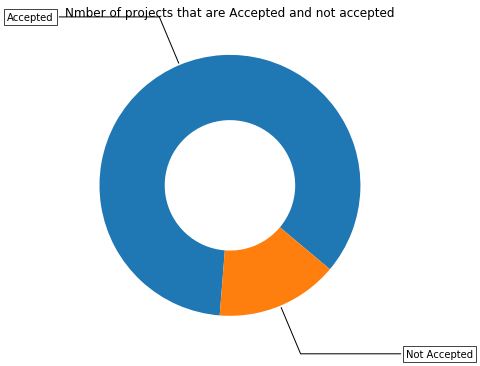

In [0]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

### 1.2.1 Univariate Analysis: School State

In [0]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

'''# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')
'''

'# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620\n\nscl = [[0.0, \'rgb(242,240,247)\'],[0.2, \'rgb(218,218,235)\'],[0.4, \'rgb(188,189,220)\'],            [0.6, \'rgb(158,154,200)\'],[0.8, \'rgb(117,107,177)\'],[1.0, \'rgb(84,39,143)\']]\n\ndata = [ dict(\n        type=\'choropleth\',\n        colorscale = scl,\n        autocolorscale = False,\n        locations = temp[\'state_code\'],\n        z = temp[\'num_proposals\'].astype(float),\n        locationmode = \'USA-states\',\n        text = temp[\'state_code\'],\n        marker = dict(line = dict (color = \'rgb(255,255,255)\',width = 2)),\n        colorbar = dict(title = "% of pro")\n    ) ]\n\nlayout = dict(\n        title = \'Project Proposals % of Acceptance Rate by US States\',\n        geo = dict(\n            scope=\'usa\',\n            projection=dict( type=\'albers usa\' ),\n            showlakes = True,\n            lakecolor = \'rgb(255, 255, 255)\',\n        ),\n    )\n\nfig = go.Figure(data=dat

In [0]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
46         VT       0.800000
7          DC       0.802326
43         TX       0.813142
26         MT       0.816327
18         LA       0.831245
States with highest % approvals
   state_code  num_proposals
30         NH       0.873563
35         OH       0.875152
47         WA       0.876178
28         ND       0.888112
8          DE       0.897959


In [0]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [0]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

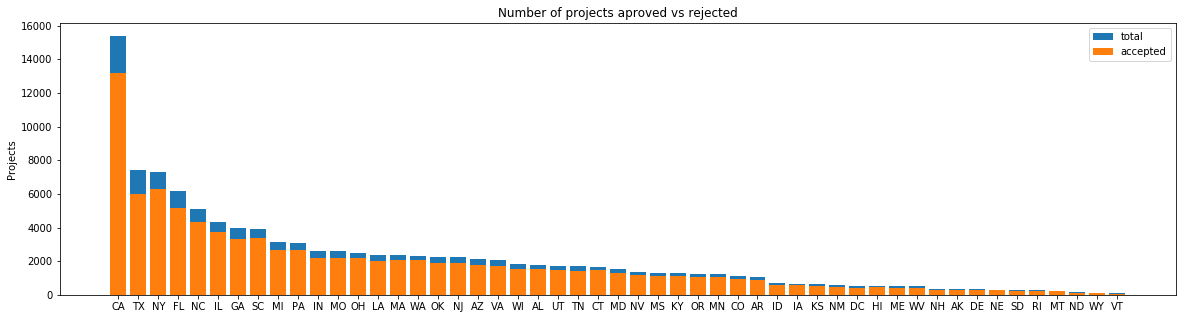

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [0]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

__SUMMARY: Every state has greater than 80% success rate in approval__

### 1.2.2 Univariate Analysis: teacher_prefix

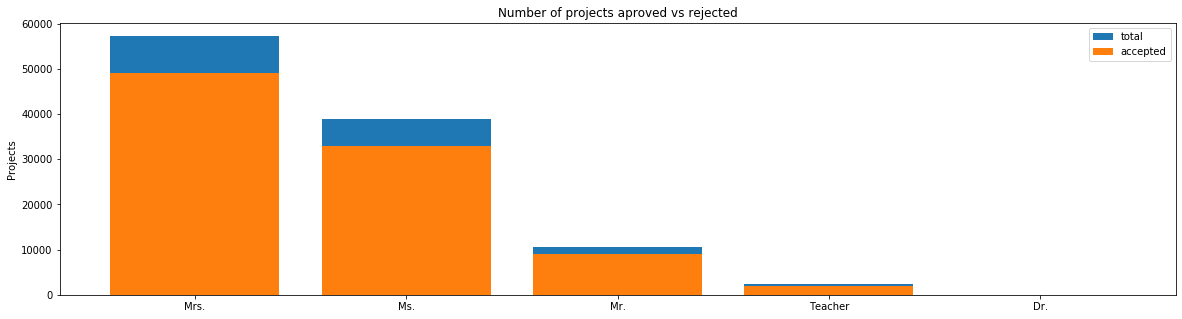

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [0]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

### 1.2.3 Univariate Analysis: project_grade_category

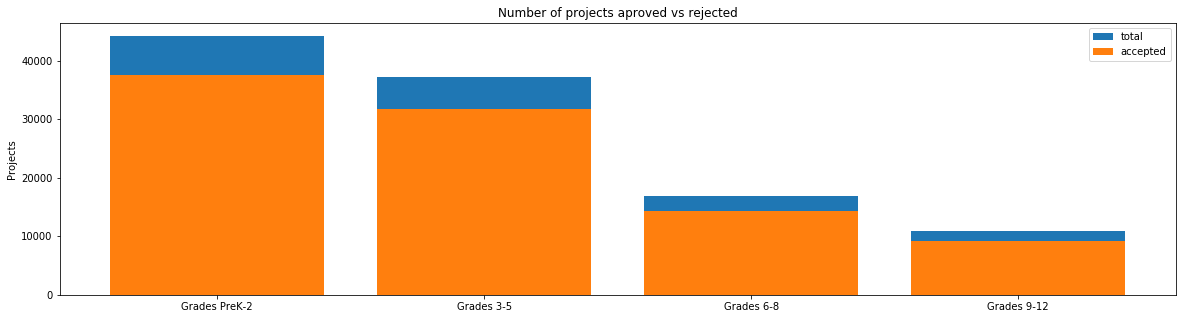

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [0]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

### 1.2.4 Univariate Analysis: project_subject_categories

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [0]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports


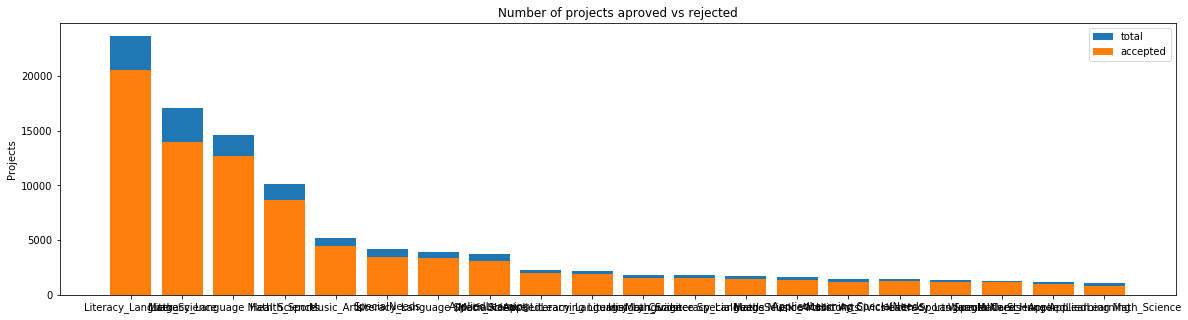

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                 1271   1421  0.894441
14        Health_Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care_Hunger                 1212   1309  0.925898
33      Math_Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math_Science                  855   1052  0.812738


In [0]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

In [0]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

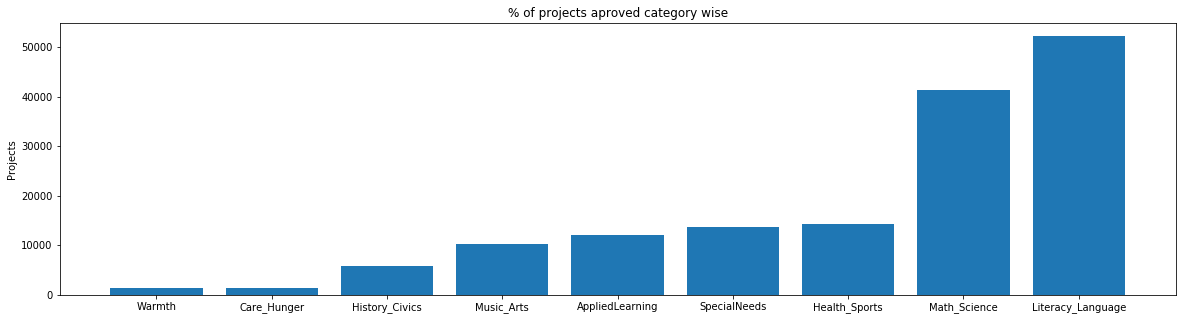

In [0]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved category wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [0]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :      1388
Care_Hunger          :      1388
History_Civics       :      5914
Music_Arts           :     10293
AppliedLearning      :     12135
SpecialNeeds         :     13642
Health_Sports        :     14223
Math_Science         :     41421
Literacy_Language    :     52239


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [0]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports


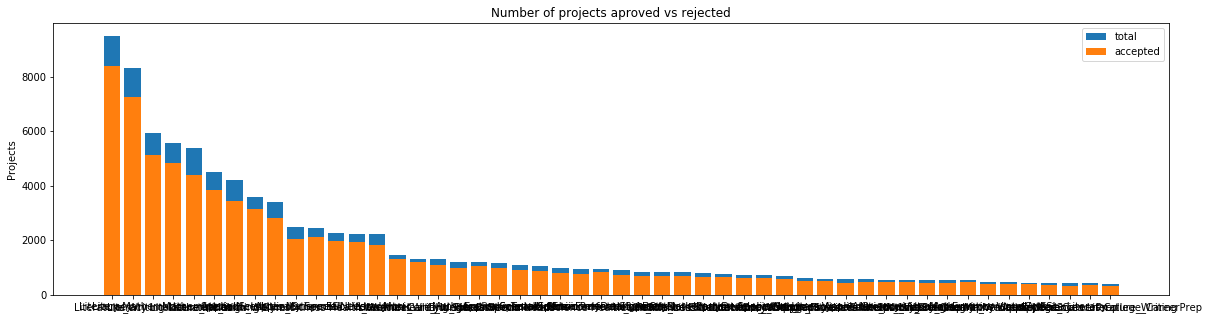

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                    clean_subcategories  project_is_approved  total       Avg
196       EnvironmentalScience Literacy                  389    444  0.876126
127                                 ESL                  349    421  0.828979
79                   College_CareerPrep                  343    421  0.814727
17   AppliedSciences Literature_Writing                  361    420  0.859524
3    AppliedSciences College_CareerPrep                  330    405  0.814815


In [0]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

In [0]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

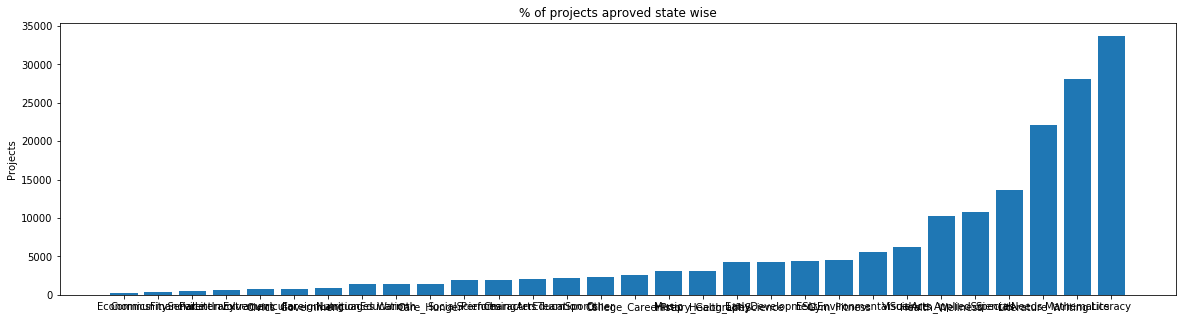

In [0]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [0]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :       269
CommunityService     :       441
FinancialLiteracy    :       568
ParentInvolvement    :       677
Extracurricular      :       810
Civics_Government    :       815
ForeignLanguages     :       890
NutritionEducation   :      1355
Warmth               :      1388
Care_Hunger          :      1388
SocialSciences       :      1920
PerformingArts       :      1961
CharacterEducation   :      2065
TeamSports           :      2192
Other                :      2372
College_CareerPrep   :      2568
Music                :      3145
History_Geography    :      3171
Health_LifeScience   :      4235
EarlyDevelopment     :      4254
ESL                  :      4367
Gym_Fitness          :      4509
EnvironmentalScience :      5591
VisualArts           :      6278
Health_Wellness      :     10234
AppliedSciences      :     10816
SpecialNeeds         :     13642
Literature_Writing   :     22179
Mathematics          :     28074
Literacy             :     33700


### 1.2.6 Univariate Analysis: Text features (Title)

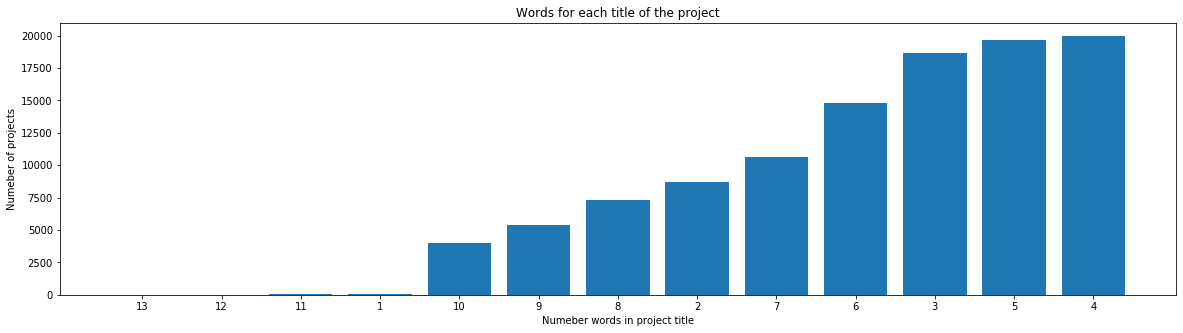

In [0]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project title')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [0]:
approved_title_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

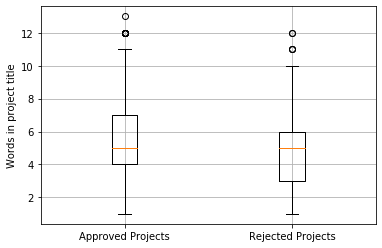

In [0]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

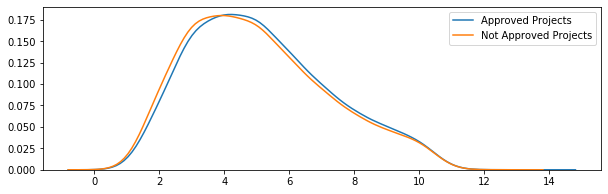

In [0]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [0]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

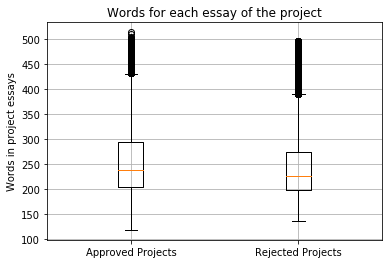

In [0]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()

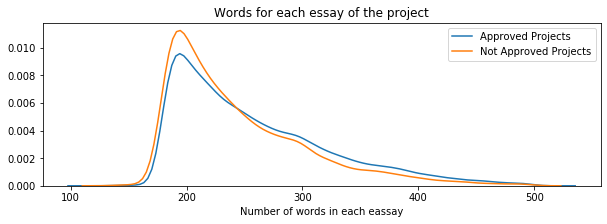

In [0]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

### 1.2.8 Univariate Analysis: Cost per project

In [0]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [0]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [0]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [0]:

approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

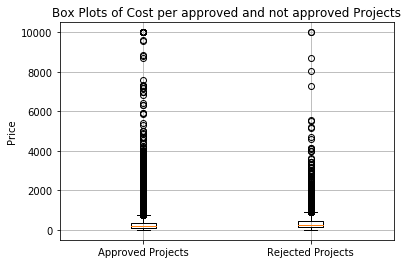

In [0]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

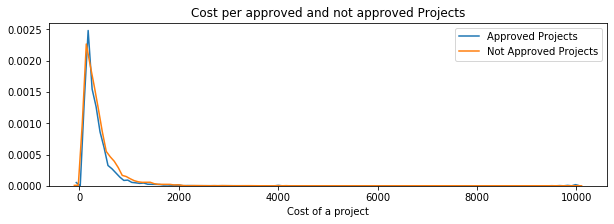

In [0]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [0]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

<h3><font color='red'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>

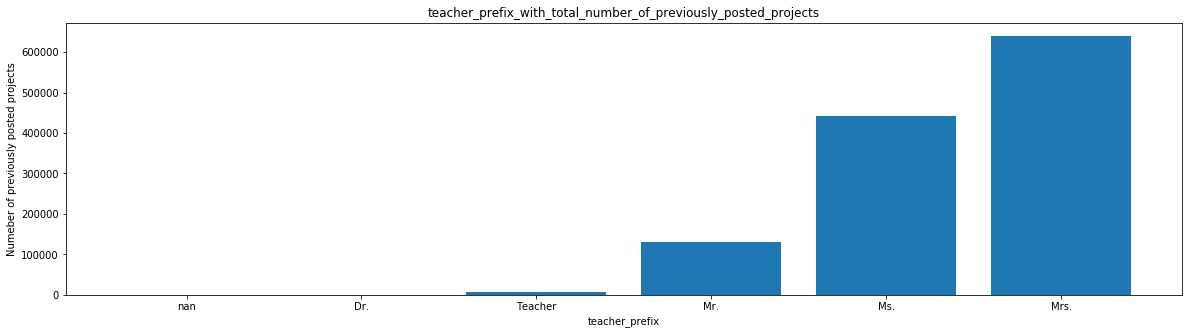

____________________________________________________________________________________________________
{nan: 0, 'Dr.': 53, 'Teacher': 7671, 'Mr.': 129559, 'Ms.': 441583, 'Mrs.': 639594}


In [0]:
teacher_prefix_with_total_number_of_previously_posted_projects={}

for i in project_data["teacher_prefix"].unique():

    teacher_prefix_with_total_number_of_previously_posted_projects[i]=project_data[project_data["teacher_prefix"] == i]["teacher_number_of_previously_posted_projects"].sum()
teacher_prefix_with_total_number_of_previously_posted_projects = dict(sorted(teacher_prefix_with_total_number_of_previously_posted_projects.items(), key=lambda kv: kv[1]))


ind = np.arange(len(teacher_prefix_with_total_number_of_previously_posted_projects))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(teacher_prefix_with_total_number_of_previously_posted_projects.values()))

plt.ylabel('Numeber of previously posted projects')
plt.xlabel('teacher_prefix')
plt.title('teacher_prefix_with_total_number_of_previously_posted_projects')
plt.xticks(ind, list(teacher_prefix_with_total_number_of_previously_posted_projects.keys()))
plt.show()
print("_"*100)
print(teacher_prefix_with_total_number_of_previously_posted_projects)

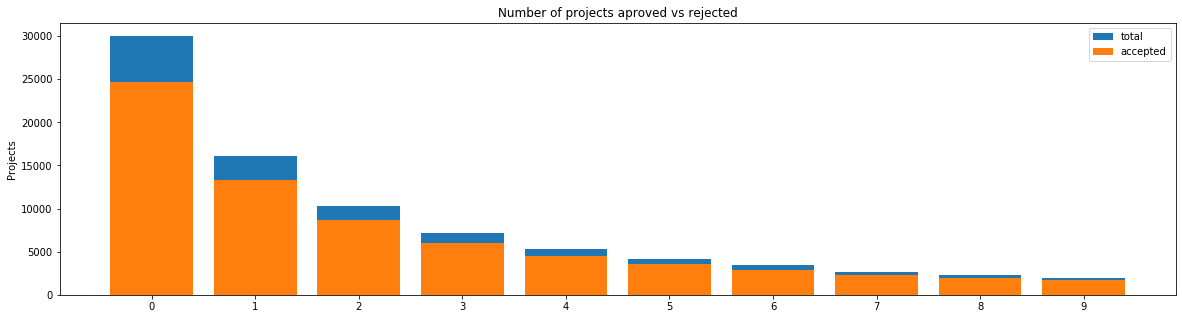

   teacher_number_of_previously_posted_projects  ...       Avg
0                                             0  ...  0.821350
1                                             1  ...  0.830054
2                                             2  ...  0.841063
3                                             3  ...  0.843460
4                                             4  ...  0.845423

[5 rows x 4 columns]
   teacher_number_of_previously_posted_projects  ...       Avg
5                                             5  ...  0.847758
6                                             6  ...  0.855170
7                                             7  ...  0.853958
8                                             8  ...  0.862189
9                                             9  ...  0.867790

[5 rows x 4 columns]


In [0]:
univariate_barplots(project_data, 'teacher_number_of_previously_posted_projects', 'project_is_approved', top=10)

<h3><font color='red'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>

In [0]:
project_data['project_resource_summary']

0         My students need opportunities to practice beg...
1         My students need a projector to help with view...
2         My students need shine guards, athletic socks,...
3         My students need to engage in Reading and Math...
4         My students need hands on practice in mathemat...
                                ...                        
109243    My students need these privacy partitions to h...
109244    My students need two iPad's and protective cas...
109245    My students need giant comfy pillows in order ...
109246    My students need flexible seating options: bea...
109247    My students need opportunities to work with te...
Name: project_resource_summary, Length: 109248, dtype: object

Please do this on your own based on the data analysis that was done in the above cells

Check if the `presence of the numerical digits` in the `project_resource_summary` effects the acceptance of the project or not. If you observe that `presence of the numerical digits` is helpful in the classification, please include it for further process or you can ignore it.

## 1.3 Text preprocessing

### 1.3.1 Essay Text

In [0]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [0]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:58<00:00, 1862.50it/s]


In [0]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h3><font color='red'>1.3.2 Project title Text</font></h3>

In [0]:
# printing some random project_title.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)
print(project_data['project_title'].values[20000])
print("="*50)
print(project_data['project_title'].values[99999])
print("="*50)

Educational Support for English Learners at Home
More Movement with Hokki Stools
Sailing Into a Super 4th Grade Year
We Need To Move It While We Input It!
Inspiring Minds by Enhancing the Educational Experience


In [0]:
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:02<00:00, 41268.06it/s]


In [0]:
preprocessed_project_title[99999]

'inspiring minds enhancing educational experience'

#1.3.3 teacher_prefix

In [0]:
#upperCase to lowercase
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.lower()
#removing puntuation from the column
#https://stackoverflow.com/questions/39782418/remove-punctuations-in-pandas
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.replace('[^\w\s]','')


In [0]:
project_data['teacher_prefix'].value_counts()

mrs        57269
ms         38955
mr         10648
teacher     2360
dr            13
Name: teacher_prefix, dtype: int64

#1.3.4 project_grade_category

In [0]:
#upperCase to lowercase
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
#removing puntuation from the column
#https://stackoverflow.com/questions/39782418/remove-punctuations-in-pandas
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('[^\w\s]','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ','_')

In [0]:
project_data.project_grade_category.value_counts()

grades_prek_2    44225
grades_3_5       37137
grades_6_8       16923
grades_9_12      10963
Name: project_grade_category, dtype: int64

#1.3.5 school_state

In [0]:
#upperCase to lowercase
project_data['school_state'] = project_data['school_state'].str.lower()
project_data.school_state.value_counts()

ca    15388
tx     7396
ny     7318
fl     6185
nc     5091
il     4350
ga     3963
sc     3936
mi     3161
pa     3109
in     2620
mo     2576
oh     2467
la     2394
ma     2389
wa     2334
ok     2276
nj     2237
az     2147
va     2045
wi     1827
al     1762
ut     1731
tn     1688
ct     1663
md     1514
nv     1367
ms     1323
ky     1304
or     1242
mn     1208
co     1111
ar     1049
id      693
ia      666
ks      634
nm      557
dc      516
hi      507
me      505
wv      503
nh      348
ak      345
de      343
ne      309
sd      300
ri      285
mt      245
nd      143
wy       98
vt       80
Name: school_state, dtype: int64

In [0]:
#upperCase to lowercase
project_data['clean_categories'] = project_data['clean_categories'].str.lower()
project_data.clean_categories.value_counts()

literacy_language                       23655
math_science                            17072
literacy_language math_science          14636
health_sports                           10177
music_arts                               5180
specialneeds                             4226
literacy_language specialneeds           3961
appliedlearning                          3771
math_science literacy_language           2289
appliedlearning literacy_language        2191
history_civics                           1851
math_science specialneeds                1840
literacy_language music_arts             1757
math_science music_arts                  1642
appliedlearning specialneeds             1467
history_civics literacy_language         1421
health_sports specialneeds               1391
warmth care_hunger                       1309
math_science appliedlearning             1220
appliedlearning math_science             1052
literacy_language history_civics          809
health_sports literacy_language   

In [0]:

project_data['clean_subcategories'] = project_data['clean_subcategories'].str.lower()
project_data.clean_subcategories.value_counts()

literacy                              9486
literacy mathematics                  8325
literature_writing mathematics        5923
literacy literature_writing           5571
mathematics                           5379
                                      ... 
communityservice financialliteracy       1
esl economics                            1
esl teamsports                           1
civics_government foreignlanguages       1
economics foreignlanguages               1
Name: clean_subcategories, Length: 401, dtype: int64

## 1. 4 Preparing data for models

In [0]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [0]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [0]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot = vectorizer.transform(project_data['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


In [0]:
# Please do the similar feature encoding with state, teacher_prefix and project_grade_category also

In [0]:
#state
vectorizer = CountVectorizer(vocabulary=list(project_data['school_state'].unique()), lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())

state_one_hot = vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encodig ",state_one_hot.shape)

['in', 'fl', 'az', 'ky', 'tx', 'ct', 'ga', 'sc', 'nc', 'ca', 'ny', 'ok', 'ma', 'nv', 'oh', 'pa', 'al', 'la', 'va', 'ar', 'wa', 'wv', 'id', 'tn', 'ms', 'co', 'ut', 'il', 'mi', 'hi', 'ia', 'ri', 'nj', 'mo', 'de', 'mn', 'me', 'wy', 'nd', 'or', 'ak', 'md', 'wi', 'sd', 'ne', 'nm', 'dc', 'ks', 'mt', 'nh', 'vt']
Shape of matrix after one hot encodig  (109248, 51)


In [0]:
# Before converting to vecter we have to remove NA values from the column , we are filling the value by column mode 
project_data['teacher_prefix'].fillna(project_data.teacher_prefix.mode()[0],inplace=True)

In [0]:
#teacher_prefix
vectorizer = CountVectorizer(vocabulary=list(project_data['teacher_prefix'].unique()), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values)
print(vectorizer.get_feature_names())
teacher_prefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['mrs', 'mr', 'ms', 'teacher', 'dr']
Shape of matrix after one hot encodig  (109248, 5)


In [0]:
#project_grade_category

vectorizer = CountVectorizer(vocabulary=list(project_data['project_grade_category'].unique()), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values)
print(vectorizer.get_feature_names())
project_grade_category_one_hot = vectorizer.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot.shape)

['grades_prek_2', 'grades_6_8', 'grades_3_5', 'grades_9_12']
Shape of matrix after one hot encodig  (109248, 4)


### 1.4.2 Vectorizing Text data

#### 1.4.2.1 Bag of words

In [0]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,max_features=8000)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 8000)


<h4><font color='red'> 1.4.2.2 Bag of Words on `project_title`</font></h4>

In [0]:
#preprocessed_project_title
vectorizer = CountVectorizer(min_df=10,max_features=1600)
project_title_bow = vectorizer.fit_transform(preprocessed_project_title)
print("Shape of matrix after one hot encodig ",project_title_bow.shape)

Shape of matrix after one hot encodig  (109248, 1600)


#### 1.4.2.3 TFIDF vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16623)


<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [0]:
vectorizer = TfidfVectorizer(min_df=10)
project_title_tfidf = vectorizer.fit_transform(preprocessed_project_title)
print("Shape of matrix after one hot encodig ",project_title_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 3329)


#### 1.4.2.5 Using Pretrained Models: Avg W2V

In [0]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('/content/drive/My Drive/Colab Notebooks/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)
print()
print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████| 109248/109248 [00:35<00:00, 3092.71it/s]


109248
300


<h4><font color='red'> 1.4.2.6 Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_pro_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_pro_title.append(vector)
print()
print(len(avg_w2v_vectors_pro_title))
print(len(avg_w2v_vectors_pro_title[0]))

100%|██████████| 109248/109248 [00:01<00:00, 58693.26it/s]


109248
300


#### 1.4.2.7 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

 98%|█████████▊| 106844/109248 [03:44<00:04, 496.57it/s]

<h4><font color='red'> 1.4.2.9 Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title.append(vector)

print(len(tfidf_w2v_vectors_project_title))
print(len(tfidf_w2v_vectors_project_title[0]))

### 1.4.3 Vectorizing Numerical features

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

teacher_number_of_previously_posted_projects 

In [0]:
previously_posted_scalar = StandardScaler()
previously_posted_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
previously_posted_standardized = previously_posted_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

In [0]:
previously_posted_standardized

In [0]:
price_standardized

### 1.4.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [0]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)
print(previously_posted_standardized.shape)
#print(tfidf_w2v_vectors_project_title.shape)
#print(tfidf_w2v_vectors.shape)
#print(avg_w2v_vectors_pro_title.shape)
#print(avg_w2v_vectors.shape)

print(project_title_bow.shape)
print(text_tfidf.shape)
print(project_title_tfidf.shape)

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)

In [0]:
project_data.columns

In [0]:
#BoW dataset
X_BoW = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized,previously_posted_standardized,
                project_grade_category_one_hot,state_one_hot ,project_title_bow,teacher_prefix_one_hot))
X_BoW.shape

In [0]:
#TFIDF dataset
X_TFIDF = hstack((categories_one_hot, sub_categories_one_hot, text_tfidf, price_standardized,previously_posted_standardized,
            project_grade_category_one_hot,state_one_hot ,project_title_tfidf,teacher_prefix_one_hot))
X_TFIDF.shape

In [0]:
#AVG W2V dataset
X_avg_w2v = hstack((categories_one_hot, sub_categories_one_hot, avg_w2v_vectors, price_standardized,previously_posted_standardized,
     
            project_grade_category_one_hot,state_one_hot ,avg_w2v_vectors_pro_title,teacher_prefix_one_hot))
X_avg_w2v.shape

In [0]:
#TFIDF W2V
X_tfidf_w2v = hstack((categories_one_hot, sub_categories_one_hot, tfidf_w2v_vectors, price_standardized,previously_posted_standardized,
                 project_grade_category_one_hot,state_one_hot ,tfidf_w2v_vectors_project_title,teacher_prefix_one_hot))
X_tfidf_w2v.shape

In [0]:
y = project_data['project_is_approved']

# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='/content/drive/My Drive/Colab Notebooks/train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='/content/drive/My Drive/Colab Notebooks/train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='/content/drive/My Drive/Colab Notebooks/confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='/content/drive/My Drive/Colab Notebooks/summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. K Nearest Neighbor</h1>

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os
from sklearn.neighbors import KNeighborsClassifier
      

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

data  = pd.read_csv('/content/drive/My Drive/Colab Notebooks/preprocessed_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 9 columns):
school_state                                    109248 non-null object
teacher_prefix                                  109248 non-null object
project_grade_category                          109248 non-null object
teacher_number_of_previously_posted_projects    109248 non-null int64
project_is_approved                             109248 non-null int64
clean_categories                                109248 non-null object
clean_subcategories                             109248 non-null object
essay                                           109248 non-null object
price                                           109248 non-null float64
dtypes: float64(1), int64(2), object(6)
memory usage: 7.5+ MB


In [0]:
project_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_data.csv')

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:02<00:00, 43037.38it/s]


In [0]:
data['project_title'] = preprocessed_project_title

In [0]:
data.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,project_title
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,educational support english learners home


<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)


,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,project_title
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,educational support english learners home


In [0]:
# train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

<h3>school_state<h3>

In [0]:
# we use count vectorizer to convert the values into one hot encoded features

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['school_state'].values)

states_one_hot_X_train = vectorizer.transform(X_train['school_state'].values)
states_one_hot_X_cv = vectorizer.transform(X_cv['school_state'].values)
states_one_hot_X_test = vectorizer.transform(X_test['school_state'].values)

print("="*50)
print("Shape of matrix after one hot encoding(school_state) ")
print("="*50)
print("X_train  :",states_one_hot_X_train.shape)
print("X_cv     :",states_one_hot_X_cv.shape)
print("X_test   :",states_one_hot_X_test.shape)
print("="*50)
print(vectorizer.get_feature_names())
print("="*50)


Shape of matrix after one hot encoding(school_state) 
X_train  : (49041, 51)
X_cv     : (24155, 51)
X_test   : (36052, 51)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


<h3>teacher_prefix
<h3>

In [0]:
# we use count vectorizer to convert the values into one hot encoded features

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['teacher_prefix'].values)

teacher_prefix_one_hot_X_train = vectorizer.transform(X_train['teacher_prefix'].values)
teacher_prefix_one_hot_X_cv = vectorizer.transform(X_cv['teacher_prefix'].values)
teacher_prefix_one_hot_X_test = vectorizer.transform(X_test['teacher_prefix'].values)


print("="*50)
print("Shape of matrix after one hot encoding(teacher_prefix) ")
print("="*50)
print("X_train  :",teacher_prefix_one_hot_X_train.shape)
print("X_cv     :",teacher_prefix_one_hot_X_cv.shape)
print("X_test   :",teacher_prefix_one_hot_X_test.shape)
print("="*50)
print(vectorizer.get_feature_names())
print("="*50)

Shape of matrix after one hot encoding(teacher_prefix) 
X_train  : (49041, 5)
X_cv     : (24155, 5)
X_test   : (36052, 5)
['dr', 'mr', 'mrs', 'ms', 'teacher']


<h3>project_grade_category	<h3>

In [0]:
# we use count vectorizer to convert the values into one hot encoded features

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['project_grade_category'].values)

project_grade_one_hot_X_train = vectorizer.transform(X_train['project_grade_category'].values)
project_grade_one_hot_X_cv = vectorizer.transform(X_cv['project_grade_category'].values)
project_grade_one_hot_X_test = vectorizer.transform(X_test['project_grade_category'].values)

print("="*50)
print("Shape of matrix after one hot encoding(project_grade_category) ")
print("="*50)
print("X_train  :",project_grade_one_hot_X_train.shape)
print("X_cv     :",project_grade_one_hot_X_cv.shape)
print("X_test   :",project_grade_one_hot_X_test.shape)
print("="*50)
print(vectorizer.get_feature_names())
print("="*50)

Shape of matrix after one hot encoding(project_grade_category) 
X_train  : (49041, 4)
X_cv     : (24155, 4)
X_test   : (36052, 4)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


<h3>clean_categories<h3>

In [0]:
# we use count vectorizer to convert the values into one hot encoded features

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['clean_categories'].values)

clean_categories_one_hot_X_train = vectorizer.transform(X_train['clean_categories'].values)
clean_categories_one_hot_X_cv = vectorizer.transform(X_cv['clean_categories'].values)
clean_categories_one_hot_X_test = vectorizer.transform(X_test['clean_categories'].values)

print("="*50)
print("Shape of matrix after one hot encoding(clean_categories) ")
print("="*50)
print("X_train  :",clean_categories_one_hot_X_train.shape)
print("X_cv     :",clean_categories_one_hot_X_cv.shape)
print("X_test   :",clean_categories_one_hot_X_test.shape)
print("="*50)
print(vectorizer.get_feature_names())
print("="*50)

Shape of matrix after one hot encoding(clean_categories) 
X_train  : (49041, 9)
X_cv     : (24155, 9)
X_test   : (36052, 9)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


<h3>clean_subcategories<h3>

In [0]:
# we use count vectorizer to convert the values into one hot encoded features

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)

clean_subcategories_one_hot_X_train = vectorizer.transform(X_train['clean_subcategories'].values)
clean_subcategories_one_hot_X_cv = vectorizer.transform(X_cv['clean_subcategories'].values)
clean_subcategories_one_hot_X_test = vectorizer.transform(X_test['clean_subcategories'].values)

print("="*50)
print("Shape of matrix after one hot encoding(clean_categories) ")
print("="*50)
print("X_train  :",clean_subcategories_one_hot_X_train.shape)
print("X_cv     :",clean_subcategories_one_hot_X_cv.shape)
print("X_test   :",clean_subcategories_one_hot_X_test.shape)
print("="*50)
print(vectorizer.get_feature_names())
print("="*50)

Shape of matrix after one hot encoding(clean_categories) 
X_train  : (49041, 30)
X_cv     : (24155, 30)
X_test   : (36052, 30)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


<h3>teacher_number_of_previously_posted_projects<h3>

In [0]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

previously_posted_X_train = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
previously_posted_X_cv = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
previously_posted_X_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("="*50)
print("Shape of matrix after vectorizations(teacher_number_of_previously_posted_projects) ")
print("="*50)
print("X_train  :",previously_posted_X_train.shape)
print("X_cv     :",previously_posted_X_cv.shape)
print("X_test   :",previously_posted_X_test.shape)
print("="*50)


Shape of matrix after vectorizations(teacher_number_of_previously_posted_projects) 
X_train  : (49041, 1)
X_cv     : (24155, 1)
X_test   : (36052, 1)


<h3>price<h3>

In [0]:
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(-1,1))

price_X_train = normalizer.transform(X_train['price'].values.reshape(-1,1))
price_X_cv = normalizer.transform(X_cv['price'].values.reshape(-1,1))
price_X_test = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("="*50)
print("Shape of matrix after vectorizations(price) ")
print("="*50)
print("X_train  :",price_X_train.shape)
print("X_cv     :",price_X_cv.shape)
print("X_test   :",price_X_test.shape)
print("="*50)

Shape of matrix after vectorizations(price) 
X_train  : (49041, 1)
X_cv     : (24155, 1)
X_test   : (36052, 1)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>



<h3>Essay - Bag of Words<h3>

In [0]:

vectorizer = CountVectorizer(min_df=10,binary=True)
vectorizer.fit(X_train['essay'].values)

essay_bag_of_words_X_train = vectorizer.transform(X_train['essay'].values)
essay_bag_of_words_X_cv = vectorizer.transform(X_cv['essay'].values)
essay_bag_of_words_X_test = vectorizer.transform(X_test['essay'].values)

print("="*50)
print("Bag of Words")
print("Shape of matrix after vectorizations (essay)")
print("="*50)
print("X_train  :",essay_bag_of_words_X_train.shape)
print("X_cv     :",essay_bag_of_words_X_cv.shape)
print("X_test   :",essay_bag_of_words_X_test.shape)
print("="*50)
print(vectorizer.get_feature_names())
print("="*50)

Bag of Words
Shape of matrix after vectorizations (essay)
X_train  : (49041, 12177)
X_cv     : (24155, 12177)
X_test   : (36052, 12177)
['00', '000', '10', '100', '1000', '101', '103', '104', '105', '10th', '11', '110', '1100', '112', '115', '11th', '12', '120', '1200', '125', '12th', '13', '130', '1300', '13th', '14', '140', '1400', '15', '150', '1500', '16', '160', '1600', '17', '170', '1700', '175', '18', '180', '1800', '19', '1950', '1960s', '1990', '19th', '1st', '20', '200', '2000', '2001', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2029', '20th', '21', '21st', '22', '225', '23', '24', '240', '25', '250', '26', '260', '27', '28', '280', '29', '2d', '2nd', '30', '300', '3000', '30am', '31', '32', '320', '33', '330', '34', '35', '350', '36', '360', '365', '37', '375', '38', '39', '3d', '3doodle', '3doodler', '3doodlers', '3rd', '40', '400', '4000', '41', '42', '43', '430', '44', '440', '45', '450'

<h3>Essay - Tf-idf<h3>

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['essay'].values)

essay_tfidf_X_train = vectorizer.transform(X_train['essay'].values)
essay_tfidf_X_cv = vectorizer.transform(X_cv['essay'].values)
essay_tfidf_X_test = vectorizer.transform(X_test['essay'].values)

print("="*50)
print("Tfidf Vectorizer")
print("Shape of matrix after vectorizations (essay)")
print("="*50)
print("X_train  :",essay_tfidf_X_train.shape)
print("X_cv     :",essay_tfidf_X_cv.shape)
print("X_test   :",essay_tfidf_X_test.shape)
print("="*50)
#print(vectorizer.get_feature_names())
#print("="*50)

Tfidf Vectorizer
Shape of matrix after vectorizations (essay)
X_train  : (49041, 12177)
X_cv     : (24155, 12177)
X_test   : (36052, 12177)


<h3>Eassay-Average Word2Vec
<h3>

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('/content/drive/My Drive/Colab Notebooks/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
essay_avg_w2v_X_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    essay_avg_w2v_X_train.append(vector)
print()

100%|██████████| 49041/49041 [00:13<00:00, 3670.29it/s]

In [0]:
essay_avg_w2v_X_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    essay_avg_w2v_X_cv.append(vector)
print()

100%|██████████| 24155/24155 [00:06<00:00, 3742.64it/s]

In [0]:
essay_avg_w2v_X_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) #as #word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    essay_avg_w2v_X_test.append(vector)
print()

100%|██████████| 36052/36052 [00:09<00:00, 3662.30it/s]

In [0]:
print("="*50)
print("Average Word2Vec")
print("Shape of matrix after vectorizations (essay)")
print("="*50)
print("X_train  :(",len(essay_avg_w2v_X_train),",",len(essay_avg_w2v_X_train[0]),")")
print("X_cv  :(",len(essay_avg_w2v_X_cv),",",len(essay_avg_w2v_X_cv[0]),")")
print("X_test  :(",len(essay_avg_w2v_X_test),",",len(essay_avg_w2v_X_test[0]),")")
print("="*50)

Average Word2Vec
Shape of matrix after vectorizations (essay)
X_train  :( 49041 , 300 )
X_cv  :( 24155 , 300 )
X_test  :( 36052 , 300 )


<h3> TFIDF W2V
<h3>

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:

# average Word2Vec
# compute average word2vec for each review.
essay_tfidf_w2v_X_train= []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_tfidf_w2v_X_train.append(vector)

print()

100%|██████████| 49041/49041 [01:34<00:00, 516.99it/s]

In [0]:
# average Word2Vec
# compute average word2vec for each review.
essay_tfidf_w2v_X_cv= []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_tfidf_w2v_X_cv.append(vector)

print()

100%|██████████| 24155/24155 [00:46<00:00, 520.83it/s]

In [0]:
# average Word2Vec
# compute average word2vec for each review.
essay_tfidf_w2v_X_test=[]; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_tfidf_w2v_X_test.append(vector)

print()

100%|██████████| 36052/36052 [01:09<00:00, 519.24it/s]

In [0]:
print("="*50)
print("Average Word2Vec")
print("Shape of matrix after vectorizations (essay)")
print("="*50)
print("X_train  :(",len(essay_tfidf_w2v_X_train),",",len(essay_tfidf_w2v_X_train[0]),")")
print("X_cv  :(",len(essay_tfidf_w2v_X_cv),",",len(essay_tfidf_w2v_X_cv[0]),")")
print("X_test  :(",len(essay_tfidf_w2v_X_test),",",len(essay_tfidf_w2v_X_test[0]),")")
print("="*50)

Average Word2Vec
Shape of matrix after vectorizations (essay)
X_train  :( 49041 , 300 )
X_cv  :( 24155 , 300 )
X_test  :( 36052 , 300 )


<h3>project_title-BoW<h3>

In [0]:
vectorizer = CountVectorizer(min_df=10,binary=True)
vectorizer.fit(X_train['project_title'].values)

project_title_bag_of_words_X_train = vectorizer.transform(X_train['project_title'].values)
project_title_bag_of_words_X_cv = vectorizer.transform(X_cv['project_title'].values)
project_title_bag_of_words_X_test = vectorizer.transform(X_test['project_title'].values)

print("="*50)
print("Bag of Words")
print("Shape of matrix after vectorizations (project_title)")
print("="*50)
print("X_train  :",project_title_bag_of_words_X_train.shape)
print("X_cv     :",project_title_bag_of_words_X_cv.shape)
print("X_test   :",project_title_bag_of_words_X_test.shape)
print("="*50)
print(vectorizer.get_feature_names())
print("="*50)

Bag of Words
Shape of matrix after vectorizations (project_title)
X_train  : (49041, 2084)
X_cv     : (24155, 2084)
X_test   : (36052, 2084)
['04', '05', '10', '100', '101', '13', '16', '1st', '2016', '2017', '21st', '2nd', '3d', '3doodler', '3rd', '4th', '5th', '60', '6th', '7th', '8th', 'abc', 'abcs', 'abilities', 'aboard', 'about', 'above', 'academic', 'academics', 'academy', 'access', 'accessible', 'accessing', 'accessories', 'achieve', 'achievement', 'achieving', 'across', 'act', 'action', 'active', 'actively', 'activities', 'activity', 'add', 'adding', 'addition', 'adhd', 'advanced', 'advancing', 'adventure', 'adventures', 'after', 'again', 'age', 'ahead', 'aid', 'aids', 'air', 'alexa', 'algebra', 'alive', 'all', 'allow', 'allows', 'along', 'aloud', 'alouds', 'alphabet', 'alternative', 'always', 'am', 'amazing', 'amazon', 'america', 'american', 'an', 'anchor', 'ancient', 'and', 'animal', 'animals', 'animation', 'another', 'answer', 'ants', 'any', 'anyone', 'anything', 'anywhere',

<h3>Project_title TfidfVectorizer

In [0]:
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['project_title'].values)

project_title_tfidf_X_train = vectorizer.transform(X_train['project_title'].values)
project_title_tfidf_X_cv = vectorizer.transform(X_cv['project_title'].values)
project_title_tfidf_X_test = vectorizer.transform(X_test['project_title'].values)

print("="*50)
print("Tfidf Vectorizer")
print("Shape of matrix after vectorizations (project_title)")
print("="*50)
print("X_train  :",project_title_tfidf_X_train.shape)
print("X_cv     :",project_title_tfidf_X_cv.shape)
print("X_test   :",project_title_tfidf_X_test.shape)
print("="*50)
#print(vectorizer.get_feature_names())
#print("="*50)

Tfidf Vectorizer
Shape of matrix after vectorizations (project_title)
X_train  : (49041, 2084)
X_cv     : (24155, 2084)
X_test   : (36052, 2084)


<h3>Project_title- Average word2vec

In [0]:

# compute average word2vec for each review.
project_title_avg_w2v_X_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    project_title_avg_w2v_X_train.append(vector)
print()

100%|██████████| 49041/49041 [00:00<00:00, 62189.10it/s]

In [0]:
project_title_avg_w2v_X_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    project_title_avg_w2v_X_cv.append(vector)
print()

100%|██████████| 24155/24155 [00:00<00:00, 58372.90it/s]

In [0]:
project_title_avg_w2v_X_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title'].values): # for each review/sentence
    vector = np.zeros(300) #as #word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    project_title_avg_w2v_X_test.append(vector)
print()

100%|██████████| 36052/36052 [00:00<00:00, 61696.32it/s]

In [0]:
print("="*50)
print("Average Word2Vec")
print("Shape of matrix after vectorizations (project_title)")
print("="*50)
print("X_train  :(",len(project_title_avg_w2v_X_train),",",len(project_title_avg_w2v_X_train[0]),")")
print("X_cv  :(",len(project_title_avg_w2v_X_cv),",",len(project_title_avg_w2v_X_cv[0]),")")
print("X_test  :(",len(project_title_avg_w2v_X_test),",",len(project_title_avg_w2v_X_test[0]),")")
print("="*50)

Average Word2Vec
Shape of matrix after vectorizations (project_title)
X_train  :( 49041 , 300 )
X_cv  :( 24155 , 300 )
X_test  :( 36052 , 300 )


<h3>Project_title- average Word2Vec

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
project_title_tfidf_w2v_X_train= []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    project_title_tfidf_w2v_X_train.append(vector)

print()

100%|██████████| 49041/49041 [00:01<00:00, 29952.82it/s]

In [0]:
# average Word2Vec
# compute average word2vec for each review.
project_title_tfidf_w2v_X_cv= []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    project_title_tfidf_w2v_X_cv.append(vector)

print()

100%|██████████| 24155/24155 [00:00<00:00, 30805.29it/s]

In [0]:
# average Word2Vec
# compute average word2vec for each review.
project_title_tfidf_w2v_X_test=[]; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    project_title_tfidf_w2v_X_test.append(vector)

print()

100%|██████████| 36052/36052 [00:01<00:00, 25347.05it/s]

In [0]:
print("="*50)
print("Average Word2Vec")
print("Shape of matrix after vectorizations (project_title)")
print("="*50)
print("X_train  :(",len(project_title_tfidf_w2v_X_train),",",len(project_title_tfidf_w2v_X_train[0]),")")
print("X_cv     :(",len(project_title_tfidf_w2v_X_cv),",",len(project_title_tfidf_w2v_X_cv[0]),")")
print("X_test   :(",len(project_title_tfidf_w2v_X_test),",",len(project_title_tfidf_w2v_X_test[0]),")")
print("="*50)

Average Word2Vec
Shape of matrix after vectorizations (project_title)
X_train  :( 49041 , 300 )
X_cv     :( 24155 , 300 )
X_test   :( 36052 , 300 )


<h3><font color='red'> Combining all feature vecters into one Vecter</font>

In [0]:
from scipy.sparse import hstack
#Bag_of_words
X_train_Bow = hstack((states_one_hot_X_train,teacher_prefix_one_hot_X_train,project_grade_one_hot_X_train,clean_categories_one_hot_X_train,
clean_subcategories_one_hot_X_train,previously_posted_X_train,price_X_train,essay_bag_of_words_X_train,project_title_bag_of_words_X_train)).tocsr()

X_cv_Bow = hstack((states_one_hot_X_cv, teacher_prefix_one_hot_X_cv,project_grade_one_hot_X_cv,clean_categories_one_hot_X_cv,
clean_subcategories_one_hot_X_cv,previously_posted_X_cv,price_X_cv,essay_bag_of_words_X_cv,project_title_bag_of_words_X_cv)).tocsr()

X_test_Bow = hstack((states_one_hot_X_test, teacher_prefix_one_hot_X_test,project_grade_one_hot_X_test,clean_categories_one_hot_X_test,
clean_subcategories_one_hot_X_test,previously_posted_X_test,price_X_test,essay_bag_of_words_X_test,project_title_bag_of_words_X_test)).tocsr()


In [0]:
X_train_tfidf = hstack((states_one_hot_X_train,teacher_prefix_one_hot_X_train,project_grade_one_hot_X_train,clean_categories_one_hot_X_train,
clean_subcategories_one_hot_X_train,previously_posted_X_train,price_X_train,essay_tfidf_X_train,project_title_tfidf_X_train)).tocsr()

X_cv_tfidf = hstack((states_one_hot_X_cv, teacher_prefix_one_hot_X_cv,project_grade_one_hot_X_cv,clean_categories_one_hot_X_cv,
clean_subcategories_one_hot_X_cv,previously_posted_X_cv,price_X_cv,essay_tfidf_X_cv,project_title_tfidf_X_cv)).tocsr()

X_test_tfidf = hstack((states_one_hot_X_test, teacher_prefix_one_hot_X_test,project_grade_one_hot_X_test,clean_categories_one_hot_X_test,
clean_subcategories_one_hot_X_test,previously_posted_X_test,price_X_test,essay_tfidf_X_test,project_title_tfidf_X_test)).tocsr()


In [0]:
X_train_avg_w2v = hstack((states_one_hot_X_train,teacher_prefix_one_hot_X_train,project_grade_one_hot_X_train,clean_categories_one_hot_X_train,
clean_subcategories_one_hot_X_train,previously_posted_X_train,price_X_train,essay_avg_w2v_X_train,project_title_avg_w2v_X_train)).tocsr()

X_cv_avg_w2v= hstack((states_one_hot_X_cv, teacher_prefix_one_hot_X_cv,project_grade_one_hot_X_cv,clean_categories_one_hot_X_cv,
clean_subcategories_one_hot_X_cv,previously_posted_X_cv,price_X_cv,essay_avg_w2v_X_cv,project_title_avg_w2v_X_cv)).tocsr()

X_test_avg_w2v = hstack((states_one_hot_X_test, teacher_prefix_one_hot_X_test,project_grade_one_hot_X_test,clean_categories_one_hot_X_test,
clean_subcategories_one_hot_X_test,previously_posted_X_test,price_X_test,essay_avg_w2v_X_test,project_title_avg_w2v_X_test)).tocsr()


In [0]:
X_train_tfidf_w2v = hstack((states_one_hot_X_train,teacher_prefix_one_hot_X_train,project_grade_one_hot_X_train,clean_categories_one_hot_X_train,
clean_subcategories_one_hot_X_train,previously_posted_X_train,price_X_train,essay_tfidf_w2v_X_train,project_title_tfidf_w2v_X_train)).tocsr()

X_cv_tfidf_w2v= hstack((states_one_hot_X_cv, teacher_prefix_one_hot_X_cv,project_grade_one_hot_X_cv,clean_categories_one_hot_X_cv,
clean_subcategories_one_hot_X_cv,previously_posted_X_cv,price_X_cv,essay_tfidf_w2v_X_cv,project_title_tfidf_w2v_X_cv)).tocsr()

X_test_tfidf_w2v = hstack((states_one_hot_X_test, teacher_prefix_one_hot_X_test,project_grade_one_hot_X_test,clean_categories_one_hot_X_test,
clean_subcategories_one_hot_X_test,previously_posted_X_test,price_X_test,essay_tfidf_w2v_X_test,project_title_tfidf_w2v_X_test)).tocsr()


In [0]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred



<h2>2.4 Appling KNN on different kind of featurization as mentioned 
in the instructions</h2>

<br>Apply KNN on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

100%|██████████| 5/5 [17:18<00:00, 206.89s/it]


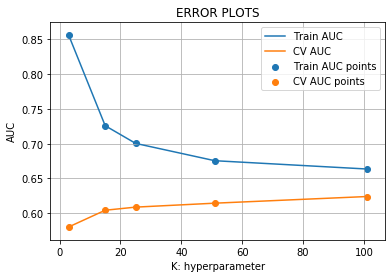

In [59]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X_train_Bow, y_train)

    y_train_pred = batch_predict(neigh, X_train_Bow)    
    y_cv_pred = batch_predict(neigh, X_cv_Bow)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>


100%|██████████| 5/5 [17:48<00:00, 212.55s/it]


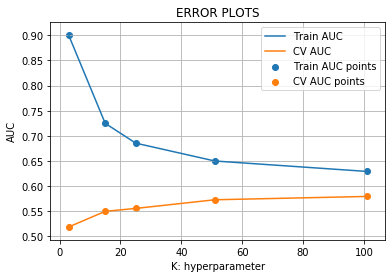

In [60]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X_train_tfidf, y_train)

    y_train_pred = batch_predict(neigh, X_train_tfidf)    
    y_cv_pred = batch_predict(neigh, X_cv_tfidf)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

100%|██████████| 5/5 [4:17:25<00:00, 3092.44s/it]


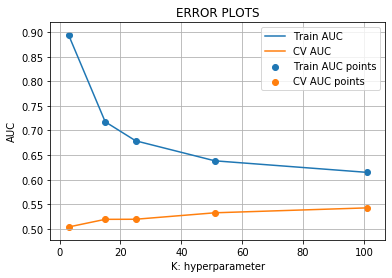

In [0]:

train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X_train_avg_w2v, y_train)

    y_train_pred = batch_predict(neigh, X_train_avg_w2v)    
    y_cv_pred = batch_predict(neigh, X_cv_avg_w2v)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

100%|██████████| 5/5 [4:13:40<00:00, 3050.22s/it]


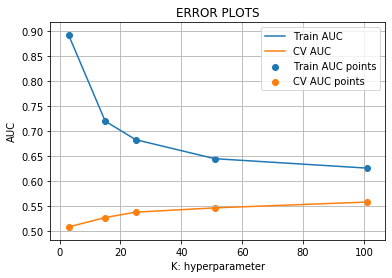

In [0]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X_train_tfidf_w2v, y_train)

    y_train_pred = batch_predict(neigh, X_train_tfidf_w2v)    
    y_cv_pred = batch_predict(neigh, X_cv_tfidf_w2v)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

<h2>2.5 Feature selection with `SelectKBest` </h2>

### BOW

In [0]:
best_k = 101

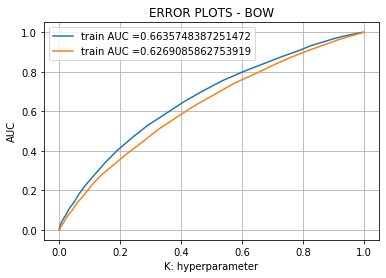

In [48]:
neigh = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
neigh.fit(X_train_Bow, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_train_Bow)    
y_test_pred = batch_predict(neigh, X_test_Bow)

train_fpr_bow, train_tpr_bow, tr_thresholds_bow = roc_curve(y_train, y_train_pred)
test_fpr_bow, test_tpr_bow, te_thresholds_bow = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr_bow, train_tpr_bow, label="train AUC ="+str(auc(train_fpr_bow, train_tpr_bow)))
plt.plot(test_fpr_bow, test_tpr_bow, label="train AUC ="+str(auc(test_fpr_bow, test_tpr_bow)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS - BOW")
plt.grid()
plt.show()

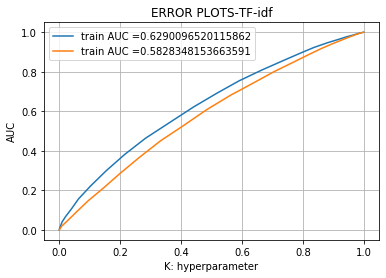

In [49]:
neigh = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
neigh.fit(X_train_tfidf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_train_tfidf)    
y_test_pred = batch_predict(neigh, X_test_tfidf)

train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_train, y_train_pred)
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr_tfidf, train_tpr_tfidf, label="train AUC ="+str(auc(train_fpr_tfidf, train_tpr_tfidf)))
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="train AUC ="+str(auc(test_fpr_tfidf, test_tpr_tfidf)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS-TF-idf")
plt.grid()
plt.show()

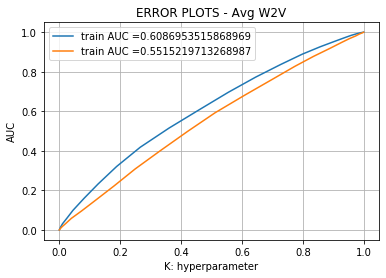

In [50]:
neigh = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
neigh.fit(X_train_avg_w2v, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_train_avg_w2v)    
y_test_pred = batch_predict(neigh, X_test_avg_w2v)

train_fpr_avg_w2v, train_tpr_avg_w2v, tr_thresholds_avg_w2v = roc_curve(y_train, y_train_pred)
test_fpr_avg_w2v, test_tpr_avg_w2v, te_thresholds_avg_w2v = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr_avg_w2v, train_tpr_avg_w2v, label="train AUC ="+str(auc(train_fpr_avg_w2v, train_tpr_avg_w2v)))
plt.plot(test_fpr_avg_w2v, test_tpr_avg_w2v, label="train AUC ="+str(auc(test_fpr_avg_w2v, test_tpr_avg_w2v)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS - Avg W2V")
plt.grid()
plt.show()

In [0]:
neigh = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
neigh.fit(X_train_tfidf_w2v, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_train_tfidf_w2v)    
y_test_pred = batch_predict(neigh, X_test_tfidf_w2v)

train_fpr_tfidf_w2v, train_tpr_tfidf_w2v, tr_thresholds_tfidf_w2v = roc_curve(y_train, y_train_pred)
test_fpr_tfidf_w2v, test_tpr_tfidf_w2v, te_thresholds_tfidf_w2v = roc_curve(y_test, y_test_pred)



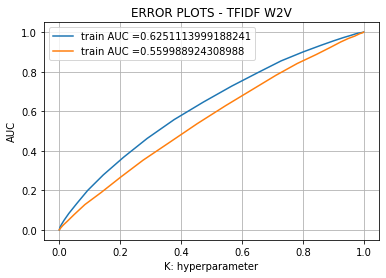

In [58]:
plt.plot(train_fpr_tfidf_w2v, train_tpr_tfidf_w2v, label="train AUC ="+str(auc(train_fpr_tfidf_w2v, train_tpr_tfidf_w2v)))
plt.plot(test_fpr_tfidf_w2v, test_tpr_tfidf_w2v, label="train AUC ="+str(auc(test_fpr_tfidf_w2v, test_tpr_tfidf_w2v)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS - TFIDF W2V")
plt.grid()
plt.show()

<h1>3. Conclusions</h1>

In [61]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "HyperParameter", "AUC_Train","AUC_Test"]
x.add_row(["BOW", "Brute", best_k, str(auc(train_fpr_bow, train_tpr_bow)),str(auc(test_fpr_bow, test_tpr_bow))])
x.add_row(["TF-idf", "Brute", best_k,  str(auc(train_fpr_tfidf, train_tpr_tfidf)),str(auc(test_fpr_tfidf, test_tpr_tfidf))])
x.add_row(["Avg W2V", "Brute", best_k,  str(auc(train_fpr_avg_w2v, train_tpr_avg_w2v)),str(auc(test_fpr_avg_w2v, test_tpr_avg_w2v)) ])
x.add_row(["TFIDF W2V", "Brute", best_k, str(auc(train_fpr_tfidf_w2v, train_tpr_tfidf_w2v)),str(auc(test_fpr_tfidf_w2v, test_tpr_tfidf_w2v))])


print(x)

+------------+-------+----------------+--------------------+--------------------+
| Vectorizer | Model | HyperParameter |     AUC_Train      |      AUC_Test      |
+------------+-------+----------------+--------------------+--------------------+
|    BOW     | Brute |      101       | 0.6635748387251472 | 0.6269085862753919 |
|   TF-idf   | Brute |      101       | 0.6290096520115862 | 0.5828348153663591 |
|  Avg W2V   | Brute |      101       | 0.6086953515868969 | 0.5515219713268987 |
| TFIDF W2V  | Brute |      101       | 0.6251113999188241 | 0.559988924308988  |
+------------+-------+----------------+--------------------+--------------------+
